In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Remplacez par le chemin correct des fichiers
sample_submission = pd.read_csv('/content/drive/My Drive/sample_submission.csv')
test = pd.read_csv('/content/drive/My Drive/test.csv')
train = pd.read_csv('/content/drive/My Drive/train.csv')


# Créer des copies
test_copy = test.copy()
train_copy = train.copy()

# Aperçu des données
print(train.head())
print(test.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllP

In [ ]:
test_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
len(train_copy.columns)
train_copy['train']  = 1
test_copy['train']  = 0
data_full = pd.concat([train_copy, test_copy], axis=0,sort=False)
data_full.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890,0.500171
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883,0.500086
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,1.000000


In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [ ]:
df_NULL = [(c, data_full[c].isna().mean()*100) for c in data_full]
df_NULL = pd.DataFrame(df_NULL, columns=["Colonne", "Taux de NULL"])
df_NULL.sort_values("Taux de NULL", ascending=False)

,Colonne,Taux de NULL
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506
25,MasVnrType,60.500171
...,...,...
43,1stFlrSF,0.000000
44,2ndFlrSF,0.000000
45,LowQualFinSF,0.000000
46,GrLivArea,0.000000


In [ ]:
from matplotlib import pyplot as plt
_df_1['Taux de NULL'].plot(kind='line', figsize=(8, 4), title='Taux de NULL')
plt.gca().spines[['top', 'right']].set_visible(False)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-22-387998224e67>, line 3)

In [ ]:
from matplotlib import pyplot as plt
_df_0['Taux de NULL'].plot(kind='hist', bins=20, title='Taux de NULL')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_0' is not defined

In [ ]:
# Variables avec plus de 50% de NULL
df_NULL = df_NULL[df_NULL["Taux de NULL"] > 80]
df_NULL.sort_values("Taux de NULL", ascending=False)


,Colonne,Taux de NULL
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506


In [ ]:
categorical_features = data_full.select_dtypes(include=['object'])
numerical_features = data_full.select_dtypes(exclude=['object'])
# Variables numériques :
print("Nombre de variables numériques :",numerical_features.shape[1])
print("\nNombre de valeurs nulles :\n",numerical_features.isnull().sum())

Nombre de variables numériques : 39

Nombre de valeurs nulles :
 Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
train               0
dtype: int64


In [ ]:
# Variables catégoriques :
print("Nombre de variables numériques :",categorical_features.shape[1])
print("\nNombre de valeurs nulles :\n",categorical_features.isnull().sum())

Nombre de variables numériques : 43

Nombre de valeurs nulles :
 MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleConditi

In [ ]:
fill_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
categorical_features[fill_None]= categorical_features[fill_None].fillna('None')

In [ ]:
fill_other = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
categorical_features[fill_other] = categorical_features[fill_other].fillna(categorical_features.mode().iloc[0])

In [ ]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2919 non-null   object
 1   Street         2919 non-null   object
 2   Alley          198 non-null    object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   Utilities      2919 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  RoofStyle      2919 non-null   object
 14  RoofMatl       2919 non-null   object
 15  Exterior1st    2919 non-null   object
 16  Exterior2nd    2919 non-null   object
 17  MasVnrType     2919 non-null   object
 18  ExterQual      2919 non-null   ob

In [ ]:
print("Médiane GarageYrBlt :",numerical_features['GarageYrBlt'].median())
print("LotFrontage :",numerical_features["LotFrontage"].median())


Médiane GarageYrBlt : 1979.0
LotFrontage : 68.0


In [ ]:
numerical_features['GarageYrBlt'] = numerical_features['GarageYrBlt'].fillna(numerical_features['GarageYrBlt'].median())
numerical_features['LotFrontage'] = numerical_features['LotFrontage'].fillna(numerical_features['LotFrontage'].median())

In [ ]:
numerical_features = numerical_features.fillna(0)
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   OverallQual    2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   YearBuilt      2919 non-null   int64  
 7   YearRemodAdd   2919 non-null   int64  
 8   MasVnrArea     2919 non-null   float64
 9   BsmtFinSF1     2919 non-null   float64
 10  BsmtFinSF2     2919 non-null   float64
 11  BsmtUnfSF      2919 non-null   float64
 12  TotalBsmtSF    2919 non-null   float64
 13  1stFlrSF       2919 non-null   int64  
 14  2ndFlrSF       2919 non-null   int64  
 15  LowQualFinSF   2919 non-null   int64  
 16  GrLivArea      2919 non-null   int64  
 17  BsmtFullBath   2919 non-null   float64
 18  BsmtHalfBath 

In [ ]:
for col in categorical_features.columns:
    #Conversion du type de variable en variable catégorique
    categorical_features[col] = categorical_features[col].astype('category')
    categorical_features[col] = categorical_features[col].cat.codes
categorical_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,-1,3,3,0,4,0,5,2,...,1,2,5,5,2,-1,-1,-1,8,4
1,3,1,-1,3,3,0,2,0,24,1,...,1,2,5,5,2,-1,-1,-1,8,4
2,3,1,-1,0,3,0,4,0,5,2,...,1,2,5,5,2,-1,-1,-1,8,4
3,3,1,-1,0,3,0,0,0,6,2,...,5,3,5,5,2,-1,-1,-1,8,0
4,3,1,-1,0,3,0,2,0,15,2,...,1,2,5,5,2,-1,-1,-1,8,4


In [ ]:
df_final = pd.concat([numerical_features,categorical_features], axis=1,sort=False)
final_train = df_final[df_final['train'] == 1]
final_train = final_train.drop(['train',],axis=1)

final_test = df_final[df_final['train'] == 0]
final_test = final_test.drop(['SalePrice'],axis=1)
final_test = final_test.drop(['train',],axis=1)

In [ ]:
final_train = final_train.drop(["Id"],axis=1)


In [ ]:
corr_train = final_train.corr()


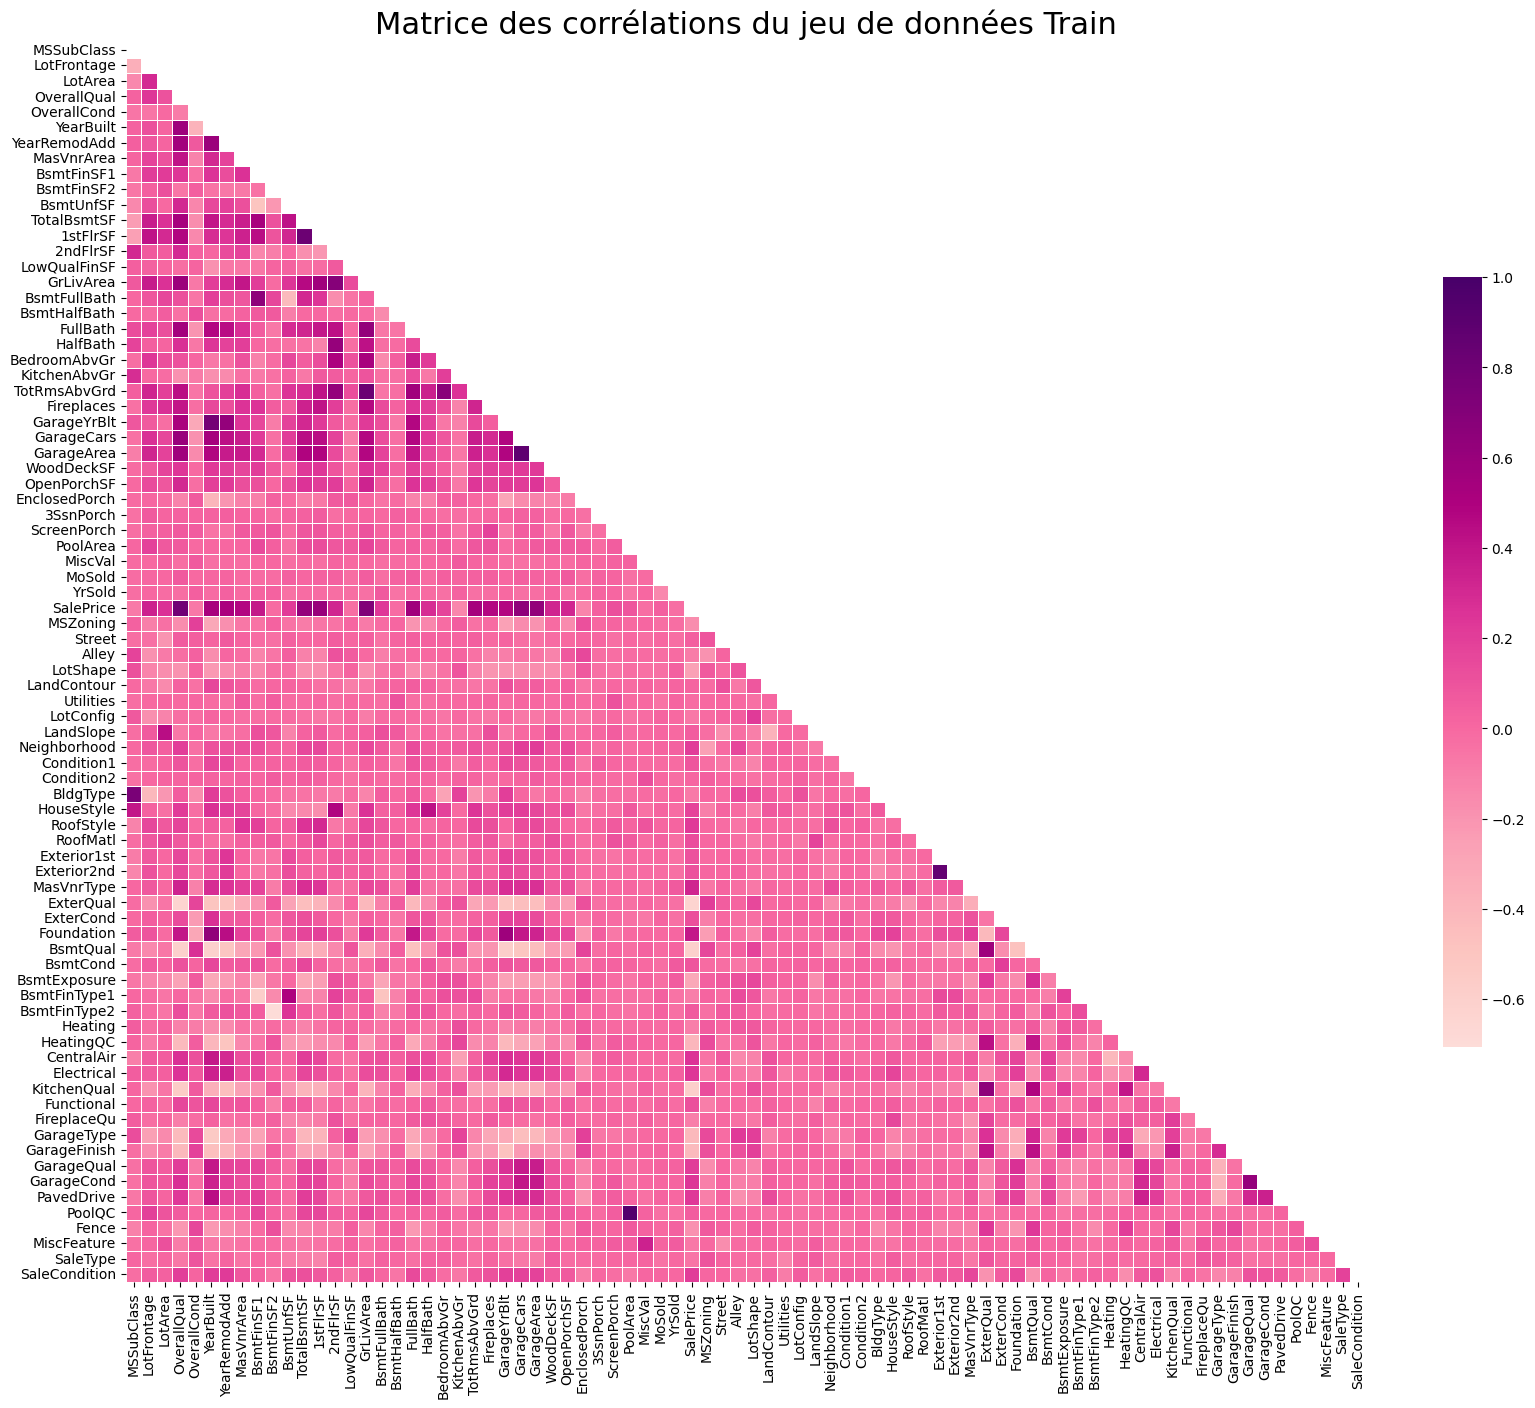

In [ ]:
# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_train, dtype=bool))

# Creating the heatmap with the chosen color scheme
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    corr_train,
    mask=mask,
    cmap="RdPu",  # Vibrant Red-Purple color scheme
    vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)
ax.set_title("Matrice des corrélations du jeu de données Train", fontsize=22)
plt.show()

In [ ]:
nocorr_features = list(corr_train[corr_train['SalePrice']<0.2].index)
nocorr_features

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [ ]:
final_train = final_train.drop(nocorr_features, axis=1)
final_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Neighborhood,RoofStyle,MasVnrType,Foundation,CentralAir,Electrical,GarageQual,GarageCond,PavedDrive,SaleCondition
0,65.0,8450,7,2003,2003,196.0,706.0,150.0,856.0,856,...,5,1,1,2,1,4,5,5,2,4
1,80.0,9600,6,1976,1976,0.0,978.0,284.0,1262.0,1262,...,24,1,1,1,1,4,5,5,2,4
2,68.0,11250,7,2001,2002,162.0,486.0,434.0,920.0,920,...,5,1,1,2,1,4,5,5,2,4
3,60.0,9550,7,1915,1970,0.0,216.0,540.0,756.0,961,...,6,1,1,0,1,4,5,5,2,0
4,84.0,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1145,...,15,1,1,2,1,4,5,5,2,4


In [ ]:
rl_features = list(corr_train[corr_train['SalePrice']>0.3].index)
rl_features.remove("SalePrice")
rl_features

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MasVnrType',
 'Foundation']

In [ ]:
Y_train = final_train["SalePrice"]
X_train = final_train.drop(["SalePrice"],axis=1)
X_train = X_train[rl_features]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)

In [ ]:
y_train_rl = y_train_rl.values.reshape(-1,1)
y_test_rl = y_test_rl.values.reshape(-1,1)

In [ ]:
#STANDADISATION DES DONNEES
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_rl = sc.fit_transform(X_train_rl)
X_test_rl = sc.fit_transform(X_test_rl)
y_train_rl = sc.fit_transform(y_train_rl)
y_test_rl = sc.fit_transform(y_test_rl)

In [ ]:
#regression lineaire
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_rl,y_train_rl)

LinearRegression()

In [ ]:
print("Intercept :",lm.intercept_)
print("Coefficients :",lm.coef_)
print("R² du modèle :",round(lm.score(X_train_rl,y_train_rl),2))

Intercept : [-2.6057113e-17]
Coefficients : [[-0.01032872  0.32374481  0.04568185  0.09653476  0.06795343  0.08268081
   0.06223981  0.02875002 -0.01478573  0.17480027  0.01126208  0.08366046
   0.0823512  -0.02547341  0.13048557  0.01418568  0.06417218  0.01864099
   0.0318834   0.0301061 ]]
R² du modèle : 0.77


In [ ]:
pred_rl = lm.predict(X_test_rl)
pred_rl = pred_rl.reshape(-1,1)

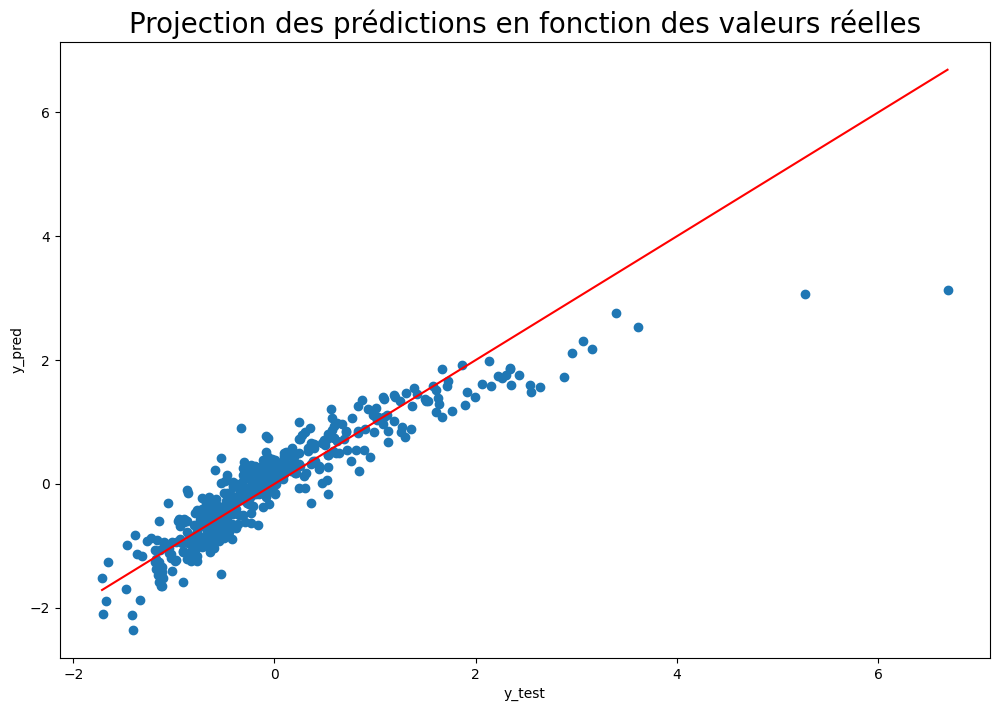

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test_rl, pred_rl)
ax.plot([y_test_rl.min(), y_test_rl.max()], [y_test_rl.min(), y_test_rl.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

In [ ]:
#Fonction de calculs des metriques importantes MAE, MSE, MAPE, RMSE
def metrics_timeseries(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    mse = np.mean(diff**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs(diff / y_true)) * 100
    dict_metrics = {"Métrique":["MAE", "MSE", "RMSE", "MAPE"], "Résultats":[mae, mse, rmse, mape]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [ ]:
metrics_rl = metrics_timeseries(y_test_rl, pred_rl)
metrics_rl

,Métrique,Résultats
0,MAE,0.282827
1,MSE,0.159615
2,RMSE,0.399519
3,MAPE,248.646843


In [ ]:
Y_rf = final_train["SalePrice"]
X_rf = final_train.drop(["SalePrice"],axis=1)

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
selector = RFECV(RandomForestRegressor(), min_features_to_select=5, step=1, cv=5)
selector.fit(X_rf,Y_rf)

RFECV(cv=5, estimator=RandomForestRegressor(), min_features_to_select=5)

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

# Create and fit the selector
selector = RFECV(RandomForestRegressor(), min_features_to_select=5, step=1, cv=5)
selector.fit(X_rf, Y_rf)

# Access cross-validation scores
grid_scores = selector.cv_results_['mean_test_score']

# Print the scores
print("Mean cross-validation scores for each feature subset:")
print(grid_scores)

# Access selected features
selected_features = X_rf.columns[selector.support_]
print("Selected features:")
print(selected_features)


Mean cross-validation scores for each feature subset:
[0.83360831 0.83435199 0.8373468  0.83981356 0.84602203 0.84837538
 0.85696383 0.85538231 0.85896378 0.85689961 0.85769726 0.854389
 0.85361433 0.8536052  0.85366317 0.86013622 0.85423807 0.85800649
 0.8600334  0.85786566 0.86015149 0.85795239 0.85792349 0.85840186
 0.85908507 0.86264427 0.85975092 0.8583601 ]
Selected features:
Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'Neighborhood', 'RoofStyle', 'MasVnrType',
       'Foundation', 'CentralAir', 'GarageQual', 'GarageCond',
       'SaleCondition'],
      dtype='object')


In [ ]:
selector.cv_results_['mean_test_score']

array([0.83360831, 0.83435199, 0.8373468 , 0.83981356, 0.84602203,
       0.84837538, 0.85696383, 0.85538231, 0.85896378, 0.85689961,
       0.85769726, 0.854389  , 0.85361433, 0.8536052 , 0.85366317,
       0.86013622, 0.85423807, 0.85800649, 0.8600334 , 0.85786566,
       0.86015149, 0.85795239, 0.85792349, 0.85840186, 0.85908507,
       0.86264427, 0.85975092, 0.8583601 ])

In [ ]:
selector.ranking_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 2, 1])

In [ ]:
best_features_rf = list(np.array(X_rf.columns)[selector.support_])
best_features_rf

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'Neighborhood',
 'RoofStyle',
 'MasVnrType',
 'Foundation',
 'CentralAir',
 'GarageQual',
 'GarageCond',
 'SaleCondition']

In [ ]:
X_rf = X_rf[best_features_rf]

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, Y_rf, test_size=0.3, random_state=1)
y_train_rf = y_train_rf.values.reshape(-1,1)
y_test_rf = y_test_rf.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

param_grid_rf = { 'n_estimators' : [10,50,100,150,200], 'max_features' : ['auto', 'sqrt']}
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [ ]:
print ("Score final : ", round(grid_search_rf.score(X_train_rf, y_train_rf) *100,4), " %")
print ("Meilleurs parametres: ", grid_search_rf.best_params_)
print ("Meilleure config: ", grid_search_rf.best_estimator_)

Score final :  97.6027  %
Meilleurs parametres:  {'max_features': 'sqrt', 'n_estimators': 150}
Meilleure config:  RandomForestRegressor(max_features='sqrt', n_estimators=150)


In [ ]:
rf =  RandomForestRegressor(max_features='sqrt', n_estimators=150)
rf.fit(X_train_rf, y_train_rf)

RandomForestRegressor(max_features='sqrt', n_estimators=150)

In [ ]:
pred_rf = rf.predict(X_test_rf)
pred_rf = pred_rf.reshape(-1,1)

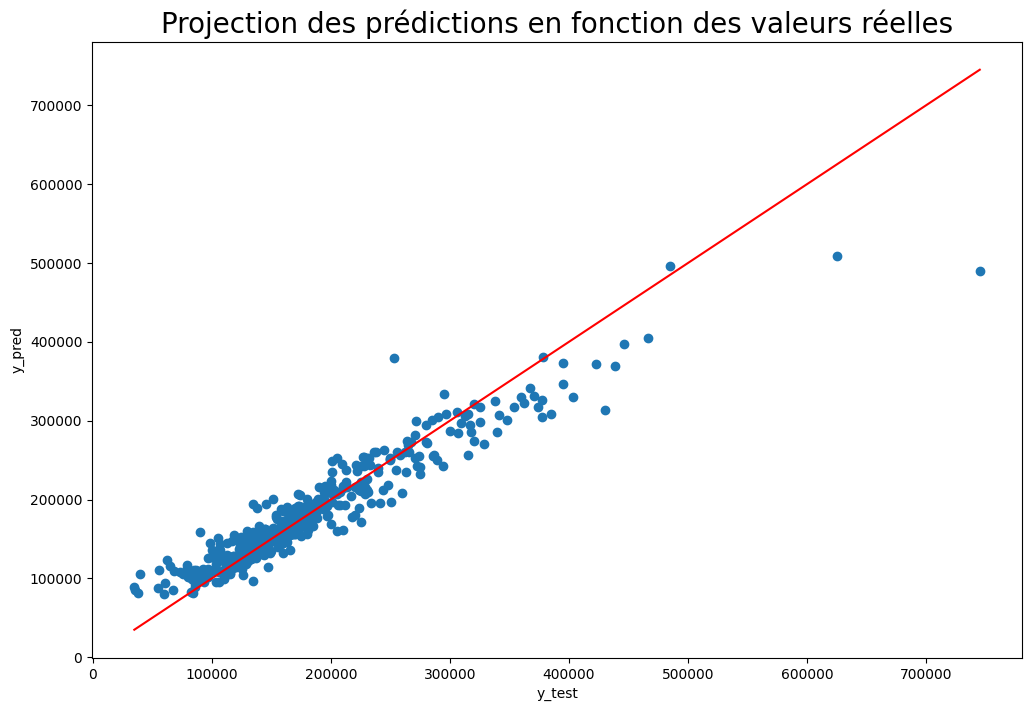

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test_rf, pred_rf)
ax.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

In [ ]:
metrics_rf = metrics_timeseries(y_test_rf, pred_rf)
metrics_rf

,Métrique,Résultats
0,MAE,1.777965e+04
1,MSE,7.579545e+08
2,RMSE,2.753097e+04
3,MAPE,1.180575e+01


from matplotlib import pyplot as plt
metrics_rf['Résultats'].plot(kind='hist', bins=20, title='Résultats')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
metrics_rf.groupby('Métrique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_rf['Résultats'].plot(kind='line', figsize=(8, 4), title='Résultats')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_rf['Métrique'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_rf, x='Résultats', y='Métrique', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
id_test = final_test["Id"]
X_pred_test = final_test[best_features_rf]

In [ ]:
pred_rf = rf.predict(X_pred_test)
pred_rf = pred_rf.reshape(-1,1)
pred_rf

array([[127794.04      ],
       [151916.72666667],
       [186356.23333333],
       ...,
       [165511.86      ],
       [113967.72      ],
       [240057.49333333]])

In [ ]:
df_submission = pd.concat([id_test,pd.Series(pred_rf[:,0])],axis=1).rename(columns={0:"SalePrice"})
df_submission

,Id,SalePrice
0,1461,127794.040000
1,1462,151916.726667
2,1463,186356.233333
3,1464,187846.600000
4,1465,190504.973333
...,...,...
1454,2915,83263.000000
1455,2916,87006.000000
1456,2917,165511.860000
1457,2918,113967.720000


from matplotlib import pyplot as plt
df_submission['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_submission['SalePrice'].plot(kind='hist', bins=20, title='SalePrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_submission.plot(kind='scatter', x='Id', y='SalePrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['SalePrice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_submission.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('SalePrice')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Id'}, axis=1)
              .sort_values('Id', ascending=True))
  xs = counted['Id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_submission.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_submission['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_submission['SalePrice'].plot(kind='line', figsize=(8, 4), title='SalePrice')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_submission.to_csv('submission.csv', index=False)